In [38]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Ward D Election Results

Brendan Doohan  
February 5, 2018

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir("C:\\Users\\nwdoohanbr\\Desktop\\WardD\\Jersey-City-Ward-D-Election")

<img src="https://github.com/bdoohan/Jersey-City-Ward-D-Election/blob/master/District%20Guide.jpeg?raw=true" alt="Districts" height="600" width="600" align="right" hspace=0>
<p align="left">This whitepaper analyzes the results of Jersey City city council race for Ward D that was held on November 7th. In that election, incumbent Michael Yun ("Yun") ran against Moriah Kinberg ("Mo"), Carmen Vega ("Vega") and Rafael Torres ("Torres"). Yun won the election.</p>  
<br clear="left"></br>
<p>This paper breaks down the results by district, race, and candidate. The predictive model used to identify likely voters is also analyzed.</p>
<br clear="left"></br>
<p>Specifically, this paper addresses the following questions:</p> 

In [4]:
results = pd.read_csv("JC_WARD_D_edited.csv", header=0, error_bad_lines=False, verbose=False, encoding="UTF-7")

In [5]:
results = results.drop('Unnamed: 8', axis=1)

### Questions to Ask

1. How was turnout by district?
2. What was the racial makeup of those who did vote?
3. Did Mo's supporters come out and vote? 
4. Where did Mo perform best?
5. Did the [Random Forest model](https://en.wikipedia.org/wiki/Random_forest) used to pinpoint likely voters accurately predict who would vote?

The paper then concludes by aggregating these insights to summarize what can be learned from the results of election. The insights aim to shed light on the voting behavior of Ward D--a ward experiencing rapid changes in terms of development and demographics.

### Q1. How was turnout by district?

<img src="https://raw.githubusercontent.com/bdoohan/Jersey-City-Ward-D-Election/master/All%20Voters%20Prcnt%20Labels.jpeg" alt="Districts" height="700" width="700" align="right" hspace=0>
<p align="left">This chart breaks down voter turnout by District. The colors correspond to the percent of total voters that each district represents. Blue colors show districts that had a high percentage of the total votes.</p>  
<br clear="left"></br>
    <p>Districts 13, 4, 5, 7 and 15 had high turnout. Overall, <b>the East side of the Heights came out and voted.</b> This is a section where Mo had strong support. The districts will be broken out for each candidate in the later sections.</p>
<br clear="left"></br>
<p>Here is the same data expressed numerically:</p> 

In [7]:
from IPython.display import display

pd.options.display.max_columns = None

adf = pd.DataFrame(
    ((results[results.Dist_VotI!=31].groupby('Dist_VotI')["Voter_ID"].count()/(results["Voter_ID"].count()))*100).round(2))
adf["Dist"] = adf.index
adf.columns = ["Voter_Prcnt", "District"]
display(adf.transpose())

Dist_VotI,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
Voter_Prcnt,2.85,2.85,3.35,4.84,4.37,3.26,3.96,3.59,4.03,3.84,2.34,3.8,5.77,2.44,3.99,2.55,3.37,2.86,3.37,4.38,3.61,3.61,2.55,2.29,3.84,3.08,4.11,1.17,3.72
District,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.0,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00,24.00,25.00,26.00,27.00,28.00,29.00


### Q2. What was the racial makeup of those who did vote?

#### White voters

<img src="https://github.com/bdoohan/Jersey-City-Ward-D-Election/blob/master/Prcnt%20White%20Labels.jpeg?raw=true" alt="White_Voters" height="700" width="700" align="right" hspace=0>
<p align="left">This chart shows the percent of Ward D <b>white voters</b> for each District. Blue colors show districts that had a high percentage of the total <b>white voters</b>.</p>  
<br clear="left"></br>
    <p>Districts 4, 5, 7 and 9 have a high percentage of the total white votes. Overall, <b>the East side of the Heights is where much of the white voters live.</b> This is a section where Mo had strong support.</p>
<br clear="left"></br>

#### Hispanic voters

<img src="https://github.com/bdoohan/Jersey-City-Ward-D-Election/blob/master/Prcnt%20hispanic%20Labels.jpeg?raw=true" alt="Hispanic_Voters" height="700" width="700" align="right" hspace=0>
<p align="left">This chart shows the percent of Ward D <b>hispanic voters</b> for each District. Blue colors show districts that had a high percentage of the total <b>hispanic voters</b>.</p>  
<br clear="left"></br>
    <p>Districts 13, 20, 5, 27 and 22 have a high percentage of the total hispanic votes. Overall, <b>the North and West sides of the Heights are where much of the hispanic voters live.</b></p>
<br clear="left"></br>

#### Black voters

<img src="https://github.com/bdoohan/Jersey-City-Ward-D-Election/blob/master/Prcnt%20Black%20Labels.jpeg?raw=true" alt="Black_Voters" height="700" width="700" align="right" hspace=0>
<p align="left">This chart shows the percent of Ward D <b>black voters</b> for each District. Blue colors show districts that had a high percentage of the total <b>black voters</b>.</p>  
<br clear="left"></br>
    <p>Districts 12, 13, and 20 have a high percentage of the total black votes. Overall, <b>the center of the Heights is where much of the black voters live.</b></p>
<br clear="left"></br>

#### Asian voters

<img src="https://github.com/bdoohan/Jersey-City-Ward-D-Election/blob/master/Prcnt%20Asian%20Labels.jpeg?raw=true" alt="Asian_Voters" height="700" width="700" align="right" hspace=0>
<p align="left">This chart shows the percent of Ward D <b>Asian voters</b> for each District. Blue colors show districts that had a high percentage of the total <b>Asian voters</b>.</p>  
<br clear="left"></br>
    <p>Districts 22, 23, 25, 27 and 29 have a high percentage of the total Asian votes. Overall, <b>the westside of the Heights is where much of the Asian voters live.</b></p>
<br clear="left"></br>

### Q3. Did Mo's supporters come out and vote?

<img src="https://github.com/bdoohan/Jersey-City-Ward-D-Election/blob/master/Mo%20Supporters%20Prcnt%20Labels.jpeg?raw=true" alt="Mo_supporters" height="700" width="700" align="right" hspace=0>
<p align="left">This chart shows where most of Mo's supporters live in Ward D. Blue colors show districts that had a high percentage of <b>Mo's supporters</b>.</p>  
<br clear="left"></br>
    <p>Districts 4, 7 and 13 have a high percentage of Mo's supporters. Overall, <b>Mo's supporters live east of Central Avenue and near Congress Street.</b></p>
<br clear="left"></br>

Here is the **percent turnout** by District:

In [47]:
results_mo["turnout_rate"] = results_mo.voted.astype(float)/results_mo.mo_supporter.astype(float)
results_mo["turnout_rate"] = results_mo["turnout_rate"].astype(float)

In [51]:
results_mo.groupby("Dist_VotI")["turnout_rate"].unstack().plot()

AttributeError: Cannot access callable attribute 'unstack' of 'SeriesGroupBy' objects, try using the 'apply' method

### First clean data

In [8]:
def get_last(string):
    return(str(string).split("|")[0])
def get_first(string):
    try:
        return(str(string).split("|")[1])
    except:
        return("")
def get_middle(string):
    try:
        return(str(string).split("|")[2])
    except:
        return("")

results["last_name"] = results.Voter_Name.apply(get_last)
results["first_name"] = results.Voter_Name.apply(get_first)
results["middle_name"] = results.Voter_Name.apply(get_middle)

### Add race

In [11]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/most-common-name/surnames.csv'
races = pd.read_csv(url,index_col=0)

In [12]:
races["last_name"] = races.index
races = races.reset_index()
races.head()

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic,last_name
0,SMITH,1,2376206,880.85,880.85,73.35,22.22,0.4,0.85,1.63,1.56,SMITH
1,JOHNSON,2,1857160,688.44,1569.30,61.55,33.8,0.42,0.91,1.82,1.5,JOHNSON
2,WILLIAMS,3,1534042,568.66,2137.96,48.52,46.72,0.37,0.78,2.01,1.6,WILLIAMS
3,BROWN,4,1380145,511.62,2649.58,60.71,34.54,0.41,0.83,1.86,1.64,BROWN
4,JONES,5,1362755,505.17,3154.75,57.69,37.73,0.35,0.94,1.85,1.44,JONES


In [13]:
def get_race(arow): 
    if arow["pctblack"]=="((S))":
        arow["pctblack"] = 0.00
    if arow["pctaian"]=="((S))":
        arow["pctaian"] = 0.00
    try:
        guess = arow[["pctwhite", "pctblack", "pctapi", "pctaian", "pct2prace", "pcthispanic"]].astype(float).idxmax(axis=1)
        return(guess)
    except:
        return("Unidentified")

In [14]:
mapping = {'(S)':.00001}
races = races.replace({'pctblack': mapping, 'pctaian': mapping,
               'pctwhite': mapping, 'pctapi': mapping, 
               'pct2prace': mapping, 'pcthispanic': mapping})

In [15]:
races["guess"] = races.apply(lambda x: get_race(x), axis=1)

In [43]:
races["guess"] = races.guess.str.replace("pct", "")

In [44]:
races.head()

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic,last_name,guess
0,SMITH,1,2376206,880.85,880.85,73.35,22.22,0.4,0.85,1.63,1.56,SMITH,white
1,JOHNSON,2,1857160,688.44,1569.30,61.55,33.8,0.42,0.91,1.82,1.5,JOHNSON,white
2,WILLIAMS,3,1534042,568.66,2137.96,48.52,46.72,0.37,0.78,2.01,1.6,WILLIAMS,white
3,BROWN,4,1380145,511.62,2649.58,60.71,34.54,0.41,0.83,1.86,1.64,BROWN,white
4,JONES,5,1362755,505.17,3154.75,57.69,37.73,0.35,0.94,1.85,1.44,JONES,white


In [18]:
results.head()

,Voter_ID,Voter_Name,Ballot_Type,Residence_Address,Zip_Code,Party,Wd_VotI,Dist_VotI,last_name,first_name,middle_name
0,110011008,ACOSTA| WILGABRIEL,M,10 CAMBRIDGE AVE AptUnit 3,7307,UNA,4.0,1.0,ACOSTA,WILGABRIEL,
1,110580340,ALONSO| EDUARDO,M,9 CAMBRIDGE AVE AptUnit 2,7307,CNV,4.0,1.0,ALONSO,EDUARDO,
2,150695981,AMADOR| FAUSTINO,M,51 CAMBRIDGE AVE AptUnit 1,7307,DEM,4.0,1.0,AMADOR,FAUSTINO,
3,150189009,ASTUDILLO| ROBERT| C,M,133 GRIFFITH ST,7307,DEM,4.0,1.0,ASTUDILLO,ROBERT,C
4,110114794,BAKER| CHRISTOPHER| M,M,12 CAMBRIDGE AVE,7307,DEM,4.0,1.0,BAKER,CHRISTOPHER,M


In [46]:
results_race = pd.merge(results, races, on="last_name", how="left")

In [47]:
results_race.guess.fillna("Unidentified", inplace=True)

In [48]:
results_race.groupby(["Dist_VotI", "guess"])["Voter_ID"].count().fillna(0).replace('NaN', 0).unstack().head()

guess,2prace,Unidentified,api,black,hispanic,white
Dist_VotI,,,,,,
1.0,NaN,22.0,23.0,1.0,63.0,71.0
2.0,NaN,29.0,30.0,3.0,56.0,62.0
3.0,1.0,42.0,14.0,5.0,52.0,98.0
4.0,3.0,58.0,8.0,4.0,71.0,162.0
5.0,1.0,37.0,10.0,2.0,100.0,126.0


In [24]:
sns.heatmap(results_race.groupby(["Dist_VotI", "guess"])["Voter_ID"].count().fillna(0).replace('NaN', 0).unstack())

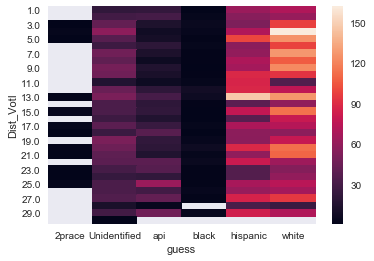

In [25]:
plt.show()

### Did Mo's Supporters Come Out and Vote?

In [10]:
mo_base = pd.read_csv("Election Day Mo Supporter List - Master 11052017.csv", 
                     names = ["first_name", "last_name", "full_name", "address", "Dist_VotI", "email", "phone"])

In [11]:
mo_base["mo_supporter"] = int(1)

In [14]:
results['first_name'] = results['first_name'].apply(lambda x: x.strip(" "))

In [15]:
results['last_name'] = results['last_name'].apply(lambda x: x.strip(" "))

In [16]:
mo_base['first_name'] = mo_base['first_name'].astype(str).apply(lambda x: x.strip(" "))
mo_base['last_name'] = mo_base['last_name'].astype(str).apply(lambda x: x.strip(" "))

mo_base['first_name'] = mo_base['first_name'].astype(str).apply(lambda x: x.split(',', 1)[0])

In [27]:
results["voted"] = int(1)

In [28]:
results_mo = pd.merge(results, mo_base[["first_name", "last_name", "mo_supporter"]],
                          on=["last_name", "first_name"], how="right")

In [29]:
results_mo.head()

,Voter_ID,Voter_Name,Ballot_Type,Residence_Address,Zip_Code,Party,Wd_VotI,Dist_VotI,last_name,first_name,middle_name,voted,mo_supporter
0,110040301,BALSARA| HARSHA,M,60 HUTTON ST,7307,DEM,4.0,1.0,BALSARA,HARSHA,,1.0,1
1,110407852,CHILCOTTE| BARBARA| J,M,24 CAMBRIDGE AVE,7307,DEM,4.0,1.0,CHILCOTTE,BARBARA,J,1.0,1
2,110407852,CHILCOTTE| BARBARA| J,M,24 CAMBRIDGE AVE,7307,DEM,4.0,1.0,CHILCOTTE,BARBARA,J,1.0,1
3,110034516,CRUZ| DAVID,MB,280 CENTRAL AVE AptUnit 2,7307,DEM,4.0,1.0,CRUZ,DAVID,,1.0,1
4,151994898,CRUZ| ROSA| M,M,141 GRIFFITH ST AptUnit 1,7307,UNA,4.0,1.0,CRUZ,ROSA,M,1.0,1


In [30]:
results_mo.fillna(0, inplace=True)

In [32]:
results_mo.voted.describe()

count    2280.000000
mean        0.361404
std         0.480513
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: voted, dtype: float64

In [22]:
mo_base[(mo_base.last_name=="MUNOZ") & (mo_base.first_name=="DAISY")]

,first_name,last_name,full_name,address,Dist_VotI,email,phone,mo_supporter
0,DAISY,MUNOZ,DAISYMUNOZ,112 FRANKLIN STREET,1,NaN,2016531621,1


In [23]:
results_mo[(results_mo.last_name=="MUNOZ") & (results_mo.first_name=="DAISY")]

,Voter_ID,Voter_Name,Ballot_Type,Residence_Address,Zip_Code,Party,Wd_VotI,Dist_VotI,last_name,first_name,middle_name,mo_supporter
104,150527999,MUNOZ| DAISY| M,M,112 FRANKLIN ST AptUnit 1,7307,DEM,4.0,1.0,MUNOZ,DAISY,M,1.0


In [24]:
mo_base[(mo_base.last_name=="MIGLIORE")]

,first_name,last_name,full_name,address,Dist_VotI,email,phone,mo_supporter
1096,ELIZABETH,MIGLIORE,"ELIZABETH, AMIGLIORE",100 MANHATTAN AVE 1R,20,NaN,NaN,1


In [25]:
results_mo[(results_mo.last_name=="DOOHAN") & (results_mo.first_name=="BRENDAN")]

,Voter_ID,Voter_Name,Ballot_Type,Residence_Address,Zip_Code,Party,Wd_VotI,Dist_VotI,last_name,first_name,middle_name,mo_supporter
4358,104597805,DOOHAN| BRENDAN| C,M,100 MANHATTAN AVE AptUnit 1R,73073027,DEM,4.0,20.0,DOOHAN,BRENDAN,C,1.0


In [26]:
results_mo.head()

,Voter_ID,Voter_Name,Ballot_Type,Residence_Address,Zip_Code,Party,Wd_VotI,Dist_VotI,last_name,first_name,middle_name,mo_supporter
0,110011008,ACOSTA| WILGABRIEL,M,10 CAMBRIDGE AVE AptUnit 3,7307,UNA,4.0,1.0,ACOSTA,WILGABRIEL,,0.0
1,110580340,ALONSO| EDUARDO,M,9 CAMBRIDGE AVE AptUnit 2,7307,CNV,4.0,1.0,ALONSO,EDUARDO,,0.0
2,150695981,AMADOR| FAUSTINO,M,51 CAMBRIDGE AVE AptUnit 1,7307,DEM,4.0,1.0,AMADOR,FAUSTINO,,0.0
3,150189009,ASTUDILLO| ROBERT| C,M,133 GRIFFITH ST,7307,DEM,4.0,1.0,ASTUDILLO,ROBERT,C,0.0
4,110114794,BAKER| CHRISTOPHER| M,M,12 CAMBRIDGE AVE,7307,DEM,4.0,1.0,BAKER,CHRISTOPHER,M,0.0


In [41]:
results_race_mo.to_csv("results_race_mo.csv")

### QGIS

In [42]:
x = results_race_mo.groupby(["Dist_VotI", "guess"])["Voter_ID"].count().unstack()
races_dist = pd.DataFrame(x)
races_dist["District"] = races_dist.index

x = results_race_mo.groupby("Dist_VotI")["mo_supporter"].sum()
mo_votes = pd.DataFrame(x)
mo_votes["District"] = mo_votes.index

In [43]:
x = results_race_mo.groupby("Dist_VotI")["Voter_ID"].count()
votes = pd.DataFrame(x)
votes["District"] = votes.index

In [44]:
qgis = pd.merge(races_dist, mo_votes, on="District", how="inner")

NameError: name 'mo_votes' is not defined

In [ ]:
qgis_final = pd.merge(qgis, votes, on="District", how="inner")

In [ ]:
qgis_final.head()

In [45]:
actuals = pd.read_csv("Data/Actuals_Election.csv")

In [ ]:
qgis_final2 = pd.merge(qgis_final, actuals, on="District", how="inner")

In [ ]:
qgis_final2.head()

In [ ]:
#qgis_final2.to_csv("QGIS_input.csv", index=False)

### QGIS done

In [ ]:
#results_race_mo = pd.read_csv("results_race_mo.csv")

In [46]:
mo_groupby = mo_base.groupby("Dist_VotI", as_index=False).mo_supporter.count() 

In [48]:
results_race_mo["Dist_VotI"] = results_race_mo.Dist_VotI.astype(str).copy()

In [49]:
mo_groupby["Dist_VotI"] = mo_groupby.Dist_VotI.astype(str).copy()

In [51]:
results_race_mo["Dist_VotI"] = results_race_mo.Dist_VotI.copy()

In [52]:
results_groupby = pd.DataFrame(
        results_race_mo.groupby(["Dist_VotI", "mo_supporter"])["Voter_ID"].count().fillna(0).replace('NaN', 0)
    )

In [57]:
results_groupby.unstack()

Dist_VotI               0.0  1.0  10.0  11.0  12.0  13.0  14.0  15.0  16.0  \
          mo_supporter                                                       
Voter_ID  0.0            12  161   217   129   220   308   130   233   143   
          1.0           NaN   21    27    19    21    64    26    20    19   
Dist_VotI               0.0  1.0  10.0  11.0  12.0  13.0  14.0  15.0  16.0   

Dist_VotI               17.0 ...   28.0  29.0  3.0  31.0  4.0  5.0  6.0  7.0  \
          mo_supporter       ...                                               
Voter_ID  0.0            190 ...     66   215  181     1  252  238  176  190   
          1.0             24 ...      8    23   32   NaN   56   40   31   62   
Dist_VotI               17.0 ...   28.0  29.0  3.0  31.0  4.0  5.0  6.0  7.0   

Dist_VotI               8.0  9.0  
          mo_supporter            
Voter_ID  0.0           216  226  
          1.0            11   30  
Dist_VotI               8.0  9.0  

[3 rows x 31 columns]

In [58]:
results_groupby = results_groupby.unstack()
#results_groupby["Dist_VotI"] = results_groupby.index
#results_groupby["Dist_VotI"] = results_groupby["Dist_VotI"].round(0)

In [59]:
results_groupby.head()

Dist_VotI               0.0  1.0  10.0  11.0  12.0  13.0  14.0  15.0  16.0  \
          mo_supporter                                                       
Voter_ID  0.0            12  161   217   129   220   308   130   233   143   
          1.0           NaN   21    27    19    21    64    26    20    19   
Dist_VotI               0.0  1.0  10.0  11.0  12.0  13.0  14.0  15.0  16.0   

Dist_VotI               17.0 ...   28.0  29.0  3.0  31.0  4.0  5.0  6.0  7.0  \
          mo_supporter       ...                                               
Voter_ID  0.0            190 ...     66   215  181     1  252  238  176  190   
          1.0             24 ...      8    23   32   NaN   56   40   31   62   
Dist_VotI               17.0 ...   28.0  29.0  3.0  31.0  4.0  5.0  6.0  7.0   

Dist_VotI               8.0  9.0  
          mo_supporter            
Voter_ID  0.0           216  226  
          1.0            11   30  
Dist_VotI               8.0  9.0  

[3 rows x 31 columns]

In [60]:
mo_groupby = mo_groupby.convert_objects(convert_numeric=True)

/Users/brendandoohan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [65]:
results_groupby.transpose().head()

Voter_ID      Dist_VotI
mo_supporter      0.0  1.0          
Dist_VotI                           
0.0                12  NaN       0.0
1.0               161   21       1.0
10.0              217   27      10.0
11.0              129   19      11.0
12.0              220   21      12.0

In [64]:
mo_groupby.head()

,Dist_VotI,mo_supporter
0,1.0,45
1,10.0,51
2,11.0,41
3,12.0,53
4,13.0,139


In [66]:
mo_turnout = pd.merge(
    results_groupby.transpose(),
    mo_groupby,
    on="Dist_VotI",
    how="inner")

/Users/brendandoohan/anaconda2/lib/python2.7/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [67]:
mo_turnout.columns = ["District", "Total_Voters", "Mo_Voters", "District_x", "Mo_supporters"]

In [68]:
mo_turnout["turnout_rate"] = mo_turnout["Mo_Voters"]/ mo_turnout.Mo_supporters

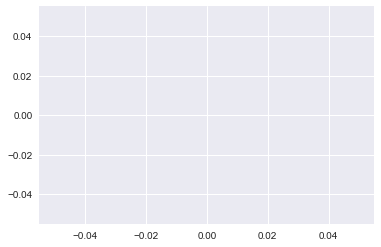

In [69]:
import matplotlib.pyplot as plt
#import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

y = mo_turnout.turnout_rate
x = mo_turnout.District
width = 1/1.5
plt.bar(x, y, width, color="blue")
#fig = plt.gcf()
#plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')
plt.show()

In [70]:
probs = pd.read_csv("Data/voters_with_petition_flag.csv")

In [71]:
probs["Voter_ID"] = probs["VOTER.ID"].astype(str)
results_race_mo["Voter_ID"] = results_race_mo["Voter_ID"].astype(str) 

In [72]:
model_eval = pd.merge(probs[["Voter_ID", "LAST.NAME", "FIRST.NAME", 
                             "likely_to_vote"]], results_race_mo, on="Voter_ID", how="left")

In [73]:
model_eval = pd.read_csv("Data/model_eval.csv")

In [74]:
#model_eval.to_csv("model_eval.csv", index=False)

In [75]:
model_eval["pred_vote"] = model_eval.likely_to_vote.apply(lambda x: 1 if x>0.50 else 0)

In [76]:
import math
model_eval["act_vote"] = model_eval.Voter_Name.apply(lambda x: 0 if pd.isnull(x) == True else 1)

In [77]:
model_eval_deduped = pd.DataFrame(
    model_eval.fillna(0).groupby(["Voter_ID", "LAST.NAME", "FIRST.NAME"])[["Dist_VotI", "pred_vote", "act_vote"]].max()
)

In [78]:
model_eval_deduped["Voter_ID"] = model_eval_deduped.index.get_level_values(0)
model_eval_deduped["LAST.NAME"] = model_eval_deduped.index.get_level_values(1)
model_eval_deduped["FIRST.NAME"] = model_eval_deduped.index.get_level_values(2)

In [79]:
model_eval_deduped.sort_values("Voter_ID", inplace=True)

In [80]:
pd.crosstab(model_eval.act_vote, model_eval.pred_vote, values=model_eval.Voter_ID, aggfunc="count")

pred_vote,0,1
act_vote,,
0,6139,8234
1,1117,5416


In [81]:
pd.crosstab(model_eval_deduped.act_vote, model_eval_deduped.pred_vote, 
            values=model_eval_deduped.Voter_ID, aggfunc="count")


pred_vote,0,1
act_vote,,
0,5393,8234
1,909,5408


In [82]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

In [83]:
cohen_kappa_score(model_eval.act_vote, model_eval.pred_vote, labels=None, weights=None)

0.19747085179099277

In [84]:
cohen_kappa_score(model_eval_deduped.act_vote, model_eval_deduped.pred_vote, labels=None, weights=None)

0.19211118969204233

In [85]:
accuracy_score(model_eval.act_vote, model_eval.pred_vote)

0.55271214005548641

In [86]:
accuracy_score(model_eval_deduped.act_vote, model_eval_deduped.pred_vote)


0.54156638588046535

In [87]:
sns.heatmap(
    model_eval_deduped.groupby(["pred_vote", "act_vote"])["Voter_ID"].count().fillna(0).replace('NaN', 0).unstack(),
        )

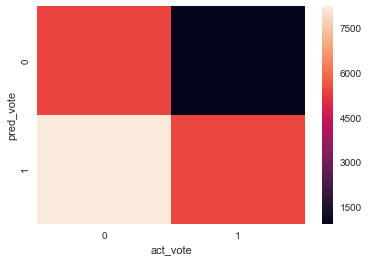

In [88]:
plt.show()

In [89]:
model_eval.head()

,Voter_ID,LAST.NAME,FIRST.NAME,likely_to_vote,Unnamed: 0,Voter_Name,Ballot_Type,Residence_Address,Zip_Code,Party,...,pctapi,pctaian,pct2prace,pcthispanic,guess,Dist_VotI_y,mo_supporter,Dist_VotI,pred_vote,act_vote
0,101116560,WARRENDAVIS,KAREN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,101116560,WARRENDAVIS,KAREN,0.977017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,101138510,JEANBAPTISTE,DIDIER,0.966093,4389.0,JEANBAPTISTE| DIDIER,M,193 GRIFFITH ST AptUnit 2,73072926,DEM,...,0.43,0.11,9.62,2.04,black,0.0,0.0,20.0,1,1
3,101139593,WYATT,ROBERT,0.841616,562.0,WYATT| ROBERT,M,126 WEBSTER AVE AptUnit 4E,7307,DEM,...,0.34,0.55,1.50,1.80,white,0.0,0.0,3.0,1,1
4,101173448,PURVIS,ANGEL,0.619970,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [90]:
#https://ocefpaf.github.io/python4oceanographers/blog/2015/02/02/cartopy_folium_shapefile/

In [91]:
import folium
import pandas as pd

In [ ]:
JC_COORDINATES = (40.7437326, -74.0550381)

# for speed purposes
MAX_RECORDS = 1000

# create empty map zoomed in on San Francisco
map = folium.Map(location=JC_COORDINATES, zoom_start=12)
 
display(map)


In [ ]:
# definition of the boundaries in the map
district_geo = r'JC_WardD.geojson'



In [ ]:
model_eval.head()

In [ ]:
# calculating total number of incidents per district
crimedata2 = pd.DataFrame(model_eval['Dist_VotI'].value_counts().astype(float))
crimedata2.to_json('crimeagg.json')
crimedata2 = crimedata2.reset_index()
crimedata2.columns = ['District', 'Number']

In [ ]:
import os

map1 = folium.Map(location=JC_COORDINATES, zoom_start=12)


map1.choropleth(
                    geo_data=open('JC_WardD.geojson').read(),
                    data=crimedata2,
                    columns=['District', 'Number'],
                    key_on='features.geometry.properties.District',
                    fill_color='YlGn',
)

map1

In [ ]:
pd.read_json('Data/JC_WardD.geojson')["features"][0]["geometry"]

In [ ]:
coords = pd.read_json('JC_WardD.geojson')["features"][0]["geometry"]["coordinates"][0]

In [ ]:
coords